In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# 자연스러운 증가 트렌드가 있는 시계열 생성
x = np.linspace(0, 1 * np.pi, 1000)

# 여러 구성요소 조합
trend = 0.3 * x  # 선형 증가 트렌드
seasonal = 0.5 * np.sin(x) + 0.2 * np.sin(3*x)  # 주기적 패턴 (다중 주파수)
#noise = 0.1 * np.random.normal(0, 1, len(x))  # 랜덤 노이즈

# 최종 시계열
y = trend + seasonal

In [22]:
save_root = '/home/hwkang/SeqSNN/analysis/figures'

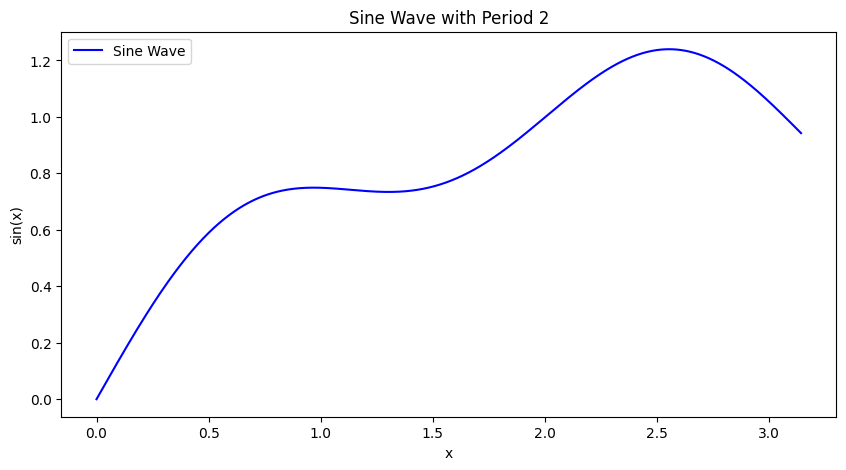

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Sine Wave', color='blue')
plt.title('Sine Wave with Period 2')
plt.xlabel('x')
plt.ylabel('sin(x)')
#plt.axhline(0, color='black', lw=0.5, ls='--')
#plt.axvline(0, color='black', lw=0.5, ls='--')
#plt.grid()
plt.legend()

plt.savefig(f'{save_root}/sine_wave_period_2.svg', format='svg', bbox_inches='tight')

plt.show()

In [24]:
# x와 shape이 같은 0으로 채워진 delta_x 생성
delta_y = np.zeros_like(y)
delta_y[0] = y[1]
delta_y[1:] = y[1:] - y[:-1]

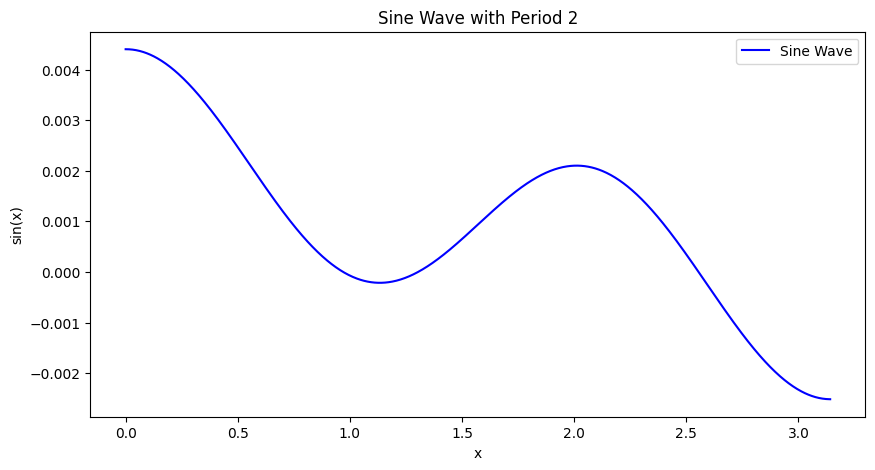

In [25]:
# delta_x 시각화

plt.figure(figsize=(10, 5))
plt.plot(x, delta_y, label='Sine Wave', color='blue')
plt.title('Sine Wave with Period 2')
plt.xlabel('x')
plt.ylabel('sin(x)')
#plt.axhline(0, color='black', lw=0.5, ls='--')
#plt.axvline(0, color='black', lw=0.5, ls='--')
#plt.grid()
plt.legend()

plt.savefig(f'{save_root}/delta_sine_wave_period_2.svg', format='svg', bbox_inches='tight')

plt.show()

In [26]:
def generate_univariate_ts_figure(x, y, filename, delta=False):
    # 만약 delta가 True라면 t와 t-1의 차분을 계산
    if delta:
        delta_y = np.zeros_like(y)
        delta_y[0] = y[1]
        delta_y[1:] = y[1:] - y[:-1]
        y = delta_y
    plt.figure(figsize=(12, 5))
    plt.plot(x, y, label='Sine Wave', color='blue')
    plt.savefig(filename, format='svg', bbox_inches='tight')
    plt.close()

In [27]:
# 임의의 복잡한 시계열 데이터 1개 생성
x = np.linspace(0, 3 * np.pi, 1000)
y = np.sin(x) + 0.1 * np.random.normal(0, 1, len(x))
generate_univariate_ts_figure(x, y, f'{save_root}/univariate_ts_1.svg')
generate_univariate_ts_figure(x, y, f'{save_root}/univariate_ts_1_delta.svg', delta=True)

In [28]:
# 임의의 복잡한 패턴의 시계열 데이터 1개 생성, 실제 시계열의 복잡한 패턴을 모방
x = np.linspace(0, 1.5 * np.pi, 1000)
y = np.sin(x) + 0.1 * np.random.normal(0, 1, len(x)) + 0.1 * np.sin(5 * x) + 0.05 * np.cos(10 * x)
generate_univariate_ts_figure(x, y, f'{save_root}/univariate_ts_2.svg')
generate_univariate_ts_figure(x, y, f'{save_root}/univariate_ts_2_delta.svg', delta=True)

In [29]:
# 1, 2와 다른 패턴으로 시계열 데이터 1개 생성, 정현파 사용하지 않고 다른 패턴 생성
x = np.linspace(0, 2 * np.pi, 1000)
y = 0.5 * np.sin(2 * x) + 0.3 * np.cos(3 * x) + 0.1 * np.random.normal(0, 1, len(x))
generate_univariate_ts_figure(x, y, f'{save_root}/univariate_ts_3.svg')
generate_univariate_ts_figure(x, y, f'{save_root}/univariate_ts_3_delta.svg', delta=True)

In [30]:
# 1, 2, 3과 다른 고유한 패턴, 트렌드가 뚜렷한 시계열 데이터 1개 생성
x = np.linspace(0, 2 * np.pi, 1000)
trend = 0.2 * x  # 선형 증가 트렌드
seasonal = 0.4 * np.sin(2 * x) + 0.2 * np.cos(3 * x)  # 주기적 패턴 (다중 주파수)
y = trend + seasonal + 0.1 * np.random.normal(0, 1, len(x))  # 랜덤 노이즈 추가
generate_univariate_ts_figure(x, y, f'{save_root}/univariate_ts_4.svg')
generate_univariate_ts_figure(x, y, f'{save_root}/univariate_ts_4_delta.svg', delta=True)